# Session 1

In [2]:
symbols = '$¢£¥€¤'

In [3]:
codes = []


In [4]:
%%time
for symbol in symbols:
...     codes.append(ord(symbol))


CPU times: user 35 µs, sys: 4 µs, total: 39 µs
Wall time: 60.3 µs


In [5]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)

In [132]:
codes

[36, 162, 163, 165, 8364, 164]

In [7]:
#magic functions

In [8]:
# %%timeit -time taken to run the piece of code

In [9]:
%%timeit

symbols = '$¢£¥€¤'
codes = []
for symbol in symbols:
    codes.append(ord(symbol))

codes


788 ns ± 8.34 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [10]:
#list of unicode character

In [11]:
codes

[36, 162, 163, 165, 8364, 164]

In [12]:
#List Comprehension

In [13]:
%%timeit

symbols = '$¢£¥€¤'
codes = [ord(symbol) for symbol in symbols]
codes


642 ns ± 12.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [14]:
#apply (function)
#apply(lamda x:x**2)

In [15]:
%%timeit
def square(x):
    x= x**2
    return x

56.7 ns ± 0.166 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [16]:
#Data Science Exercise

In [17]:
# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
# Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv

In [18]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [19]:
!head fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
04/30/2019 11:00:00 PM,8,16
04/30/2019 10:00:00 PM,15,29
04/30/2019 09:00:00 PM,17,54
04/30/2019 08:00:00 PM,58,91
04/30/2019 07:00:00 PM,106,175
04/30/2019 06:00:00 PM,142,371
04/30/2019 05:00:00 PM,214,587
04/30/2019 04:00:00 PM,113,346
04/30/2019 03:00:00 PM,68,113


In [20]:
data= pd.read_csv('fremont.csv',index_col='Date', parse_dates=True)

In [21]:
data.dtypes

Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [22]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-04-30 23:00:00,8.0,16.0
2019-04-30 22:00:00,15.0,29.0
2019-04-30 21:00:00,17.0,54.0
2019-04-30 20:00:00,58.0,91.0
2019-04-30 19:00:00,106.0,175.0


In [23]:
data.columns=['West','East']

In [24]:
data.head()

,West,East
Date,,
2019-04-30 23:00:00,8.0,16.0
2019-04-30 22:00:00,15.0,29.0
2019-04-30 21:00:00,17.0,54.0
2019-04-30 20:00:00,58.0,91.0
2019-04-30 19:00:00,106.0,175.0


In [25]:
data['Total']=data['West']+data['East']

In [26]:
data.head()

,West,East,Total
Date,,,
2019-04-30 23:00:00,8.0,16.0,24.0
2019-04-30 22:00:00,15.0,29.0,44.0
2019-04-30 21:00:00,17.0,54.0,71.0
2019-04-30 20:00:00,58.0,91.0,149.0
2019-04-30 19:00:00,106.0,175.0,281.0


# Session 2

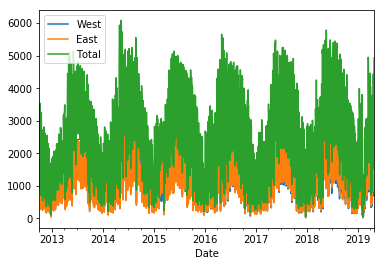

In [27]:
data.resample('D').sum().plot()

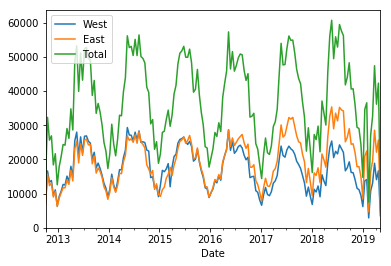

In [28]:
data.resample('2W').sum().plot()

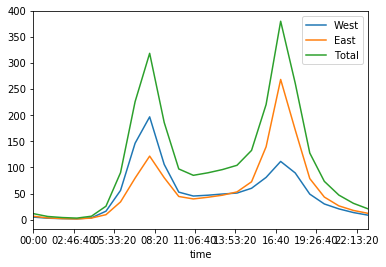

In [29]:
data.groupby(data.index.time).mean().plot()

In [30]:
pivoted=data.pivot_table('Total',index=data.index.time,columns=data.index.date)

pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


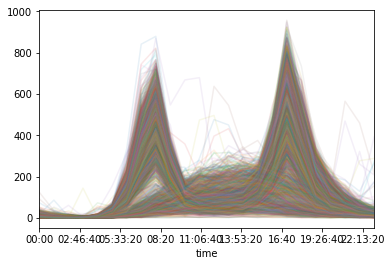

In [31]:
pivoted.plot(legend=False, alpha=0.1)

In [32]:
#put semicolon to suppress warning
#doesnt print anything

In [33]:
#Unsupervised learning

In [34]:
X=pivoted.fillna(0).T.values

In [35]:
X.shape

(2401, 24)

In [36]:
#PCA

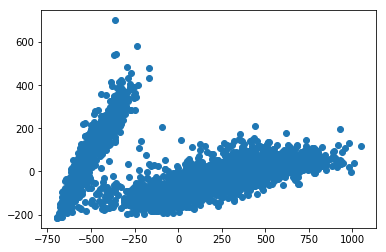

In [37]:
from sklearn.decomposition import PCA
pca=PCA(2, svd_solver='full').fit(X)
X2=pca.transform(X)

plt.scatter(X2[:,0], X2[:,1]);

In [38]:
#LACK OF DATA-put 0 

In [39]:
#blas and pack- Linear algebra

In [40]:
pca.explained_variance_ratio_

array([0.88204425, 0.07309972])

In [41]:
for i in np.arange(1,10):

    pca=PCA(i, svd_solver='full').fit(X)
    print('Components:%f, Variance: %0.2f' % (i,sum(pca.explained_variance_ratio_)))

Components:1.000000, Variance: 0.88
Components:2.000000, Variance: 0.96
Components:3.000000, Variance: 0.97
Components:4.000000, Variance: 0.98
Components:5.000000, Variance: 0.98
Components:6.000000, Variance: 0.99
Components:7.000000, Variance: 0.99
Components:8.000000, Variance: 0.99
Components:9.000000, Variance: 0.99


In [42]:
# Ideally look for 95

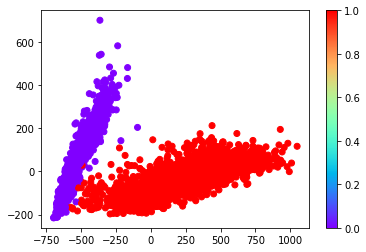

In [43]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(2)

gmm.fit(X)

labels= gmm.predict(X)
labels

plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow');
plt.colorbar();

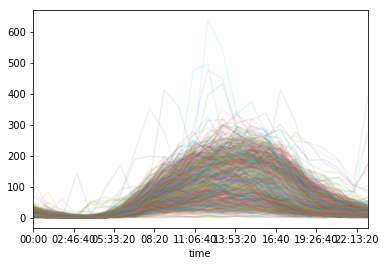

In [44]:
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1);

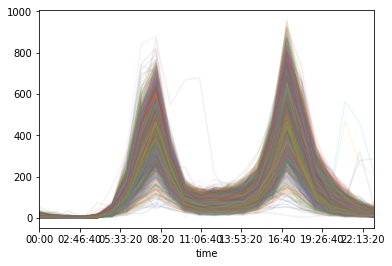

In [45]:
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1);

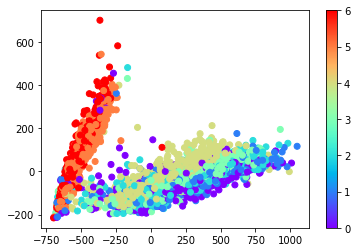

In [46]:
dayofweek= pd.DatetimeIndex(pivoted.columns).dayofweek

plt.scatter(X2[:,0], X2[:,1],c=dayofweek, cmap='rainbow')
plt.colorbar();

In [47]:
dates= pd.DatetimeIndex(pivoted.columns)
dates[(labels ==0) & (dayofweek <5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01', '2018-05-28', '2018-07-04', '2018-09-03',
               '2018-11-22', '2018-11-23', '2018-12-24', '2018-12-25',
      

# Session 4

In [62]:
weather_data= pd.read_csv('seattle_weather.csv')

In [63]:
weather_data.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2012-10-03,0.0,0.0,0.0,NaN,66,46
1,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2012-10-04,0.0,0.0,0.0,NaN,66,47
2,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2012-10-05,0.0,0.0,0.0,NaN,71,48
3,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2012-10-06,0.0,0.0,0.0,NaN,75,46
4,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2012-10-07,0.0,0.0,0.0,NaN,75,46


# Linear Regression

## Bicycle Dataset 

* Daily Counts of cycles
* Dummy variables (Monday to Sunday dummy variable)

In [48]:
data.head()

,West,East,Total
Date,,,
2019-04-30 23:00:00,8.0,16.0,24.0
2019-04-30 22:00:00,15.0,29.0,44.0
2019-04-30 21:00:00,17.0,54.0,71.0
2019-04-30 20:00:00,58.0,91.0,149.0
2019-04-30 19:00:00,106.0,175.0,281.0


In [63]:
Total_daily=data['Total'].groupby(data.index.date).sum()

In [64]:
Total_daily

2012-10-03    3521.0
2012-10-04    3475.0
2012-10-05    3148.0
2012-10-06    2006.0
2012-10-07    2142.0
2012-10-08    3537.0
2012-10-09    3501.0
2012-10-10    3235.0
2012-10-11    3047.0
2012-10-12    2011.0
2012-10-13     766.0
2012-10-14     698.0
2012-10-15    2273.0
2012-10-16    3036.0
2012-10-17    3243.0
2012-10-18    2923.0
2012-10-19    1977.0
2012-10-20    1068.0
2012-10-21     989.0
2012-10-22    2129.0
2012-10-23    2500.0
2012-10-24    2429.0
2012-10-25    2713.0
2012-10-26    2073.0
2012-10-27     531.0
2012-10-28    1062.0
2012-10-29    2217.0
2012-10-30    1735.0
2012-10-31    1710.0
2012-11-01    2091.0
               ...  
2019-04-01    4331.0
2019-04-02    4461.0
2019-04-03    3184.0
2019-04-04    4056.0
2019-04-05    2386.0
2019-04-06     711.0
2019-04-07    1206.0
2019-04-08    2699.0
2019-04-09    3347.0
2019-04-10    2739.0
2019-04-11    2317.0
2019-04-12    2941.0
2019-04-13     797.0
2019-04-14     985.0
2019-04-15    3762.0
2019-04-16    3599.0
2019-04-17   

In [82]:
#alternate

In [72]:
daily=pd.DataFrame(columns=['Date','Total','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [73]:
daily

,Date,Total,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday


In [74]:
daily['Total']=Total_daily

In [75]:
daily.head()

,Date,Total,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012-10-03,NaN,3521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,NaN,3475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,NaN,3148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-06,NaN,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-07,NaN,2142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
daily=daily.drop(columns=['Date'])

In [79]:
daily.head()

,Total,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012-10-03,3521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,3475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,3148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-06,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-07,2142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#alternate

In [87]:
daily_counts=daily=data.resample('D').sum()['Total']

In [88]:
daily_new=pd.DataFrame(columns=['total'])
daily_new['Total']=daily_counts

In [92]:
daily_new=daily_new.drop(['total'],axis=1)

In [94]:
daily_new.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


In [97]:
day_list=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

for i in range(7):
    daily_new[day_list[i]]= (daily_new.index.dayofweek == i).astype(int)

In [98]:
daily_new.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0
2012-10-04,3475.0,0,0,0,1,0,0,0
2012-10-05,3148.0,0,0,0,0,1,0,0
2012-10-06,2006.0,0,0,0,0,0,1,0
2012-10-07,2142.0,0,0,0,0,0,0,1


# Seattle Weather Data

In [100]:
!head seattle_weather.csv

"STATION","NAME","DATE","PRCP","SNOW","SNWD","TAVG","TMAX","TMIN"
"USW00024233","SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US","2012-10-03","0.00","0.0","0.0",,"66","46"
"USW00024233","SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US","2012-10-04","0.00","0.0","0.0",,"66","47"
"USW00024233","SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US","2012-10-05","0.00","0.0","0.0",,"71","48"
"USW00024233","SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US","2012-10-06","0.00","0.0","0.0",,"75","46"
"USW00024233","SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US","2012-10-07","0.00","0.0","0.0",,"75","46"
"USW00024233","SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US","2012-10-08","0.00","0.0","0.0",,"70","46"
"USW00024233","SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US","2012-10-09","0.00","0.0","0.0",,"61","48"
"USW00024233","SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US","2012-10-10","0.00","0.0","0.0",,"54","47"
"USW00024233","SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US","2012-10-11","0.00","0.0","0.0",,"57","45"


In [101]:
weather_data= pd.read_csv('seattle_weather.csv',index_col='DATE', parse_dates=True)

In [102]:
weather_data.head()

,STATION,NAME,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,0.0,NaN,66,46
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,0.0,NaN,66,47
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,0.0,NaN,71,48
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,0.0,NaN,75,46
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,0.0,NaN,75,46


In [106]:
weather_data['Tavg']=(weather_data['TMAX']+weather_data['TMIN'])/2

In [108]:
weather_data=weather_data.drop(['SNWD','TAVG','TMIN'],axis=1)

In [109]:
weather_data.head()

,STATION,NAME,PRCP,SNOW,TMAX,Tavg
DATE,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,66,56.0
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,66,56.5
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,71,59.5
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,75,60.5
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,75,60.5


In [110]:
result = pd.concat([daily_new, weather_data], axis=1, sort=False)

In [115]:
result.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,STATION,NAME,PRCP,SNOW,Tavg
2012-10-03,3521.0,0,0,1,0,0,0,0,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,56.0
2012-10-04,3475.0,0,0,0,1,0,0,0,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,56.5
2012-10-05,3148.0,0,0,0,0,1,0,0,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,59.5
2012-10-06,2006.0,0,0,0,0,0,1,0,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,60.5
2012-10-07,2142.0,0,0,0,0,0,0,1,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,60.5


In [116]:
result=result.drop(['STATION','NAME'],axis=1)

In [117]:
result.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,PRCP,SNOW,Tavg
2012-10-03,3521.0,0,0,1,0,0,0,0,0.0,0.0,56.0
2012-10-04,3475.0,0,0,0,1,0,0,0,0.0,0.0,56.5
2012-10-05,3148.0,0,0,0,0,1,0,0,0.0,0.0,59.5
2012-10-06,2006.0,0,0,0,0,0,1,0,0.0,0.0,60.5
2012-10-07,2142.0,0,0,0,0,0,0,1,0.0,0.0,60.5


In [118]:
result['PRCP']=result['PRCP']/254
result['SNOW']=result['SNOW']/254

In [119]:
result.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,PRCP,SNOW,Tavg
2012-10-03,3521.0,0,0,1,0,0,0,0,0.0,0.0,56.0
2012-10-04,3475.0,0,0,0,1,0,0,0,0.0,0.0,56.5
2012-10-05,3148.0,0,0,0,0,1,0,0,0.0,0.0,59.5
2012-10-06,2006.0,0,0,0,0,0,1,0,0.0,0.0,60.5
2012-10-07,2142.0,0,0,0,0,0,0,1,0.0,0.0,60.5


In [120]:
#SNOW=Snowfall

In [127]:
Y=result['Total']

features=['Mon','Tue','Wed','Thu','Fri','Sat','Sun','PRCP','SNOW','Tavg']

X=result[features]

In [128]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [129]:
model.coef_

array([ 4.29306628e+02,  6.77542555e+02,  6.41177856e+02,  4.67540720e+02,
        1.62265859e+02, -1.14924813e+03, -1.22858549e+03, -3.20967314e+05,
        1.22046007e+02,  6.77110143e+01])

In [130]:
#Compare two models using AIC- Lower AIC is better

In [131]:
#AIC is standard across all model